# Train the model using the ArcGIS API

### Prepare training sample data

After creating training sample data, you typically have to prepare this data by splitting it into training and validation sets, applying data augmentation techniques, and creating batches for computer memory management. The ArcGIS API `prepare_data` method can automate this entire process. It uses a default set of transformations to augment the training sample data. You can specify your own transformations or keep the defaults.

In [1]:
# Import the required packages.
from arcgis.learn import SingleShotDetector, prepare_data

In [2]:
# Load the image chips into memory.
data_path = r'D:\Esri\MOOC\Spatial Data Science\Section 5\ObjectDetection\ImageChips' 

#Run the prepare_data method, specifying the class value and name but leaving the default transformations.
data = prepare_data(data_path, {0:'Pool'})
data.classes

['background', 'Pool']

### Visualize the augmented training sample data
The`.show_batch()` method will visualize the exported training samples and their labels after applying the data augmentation transformations.

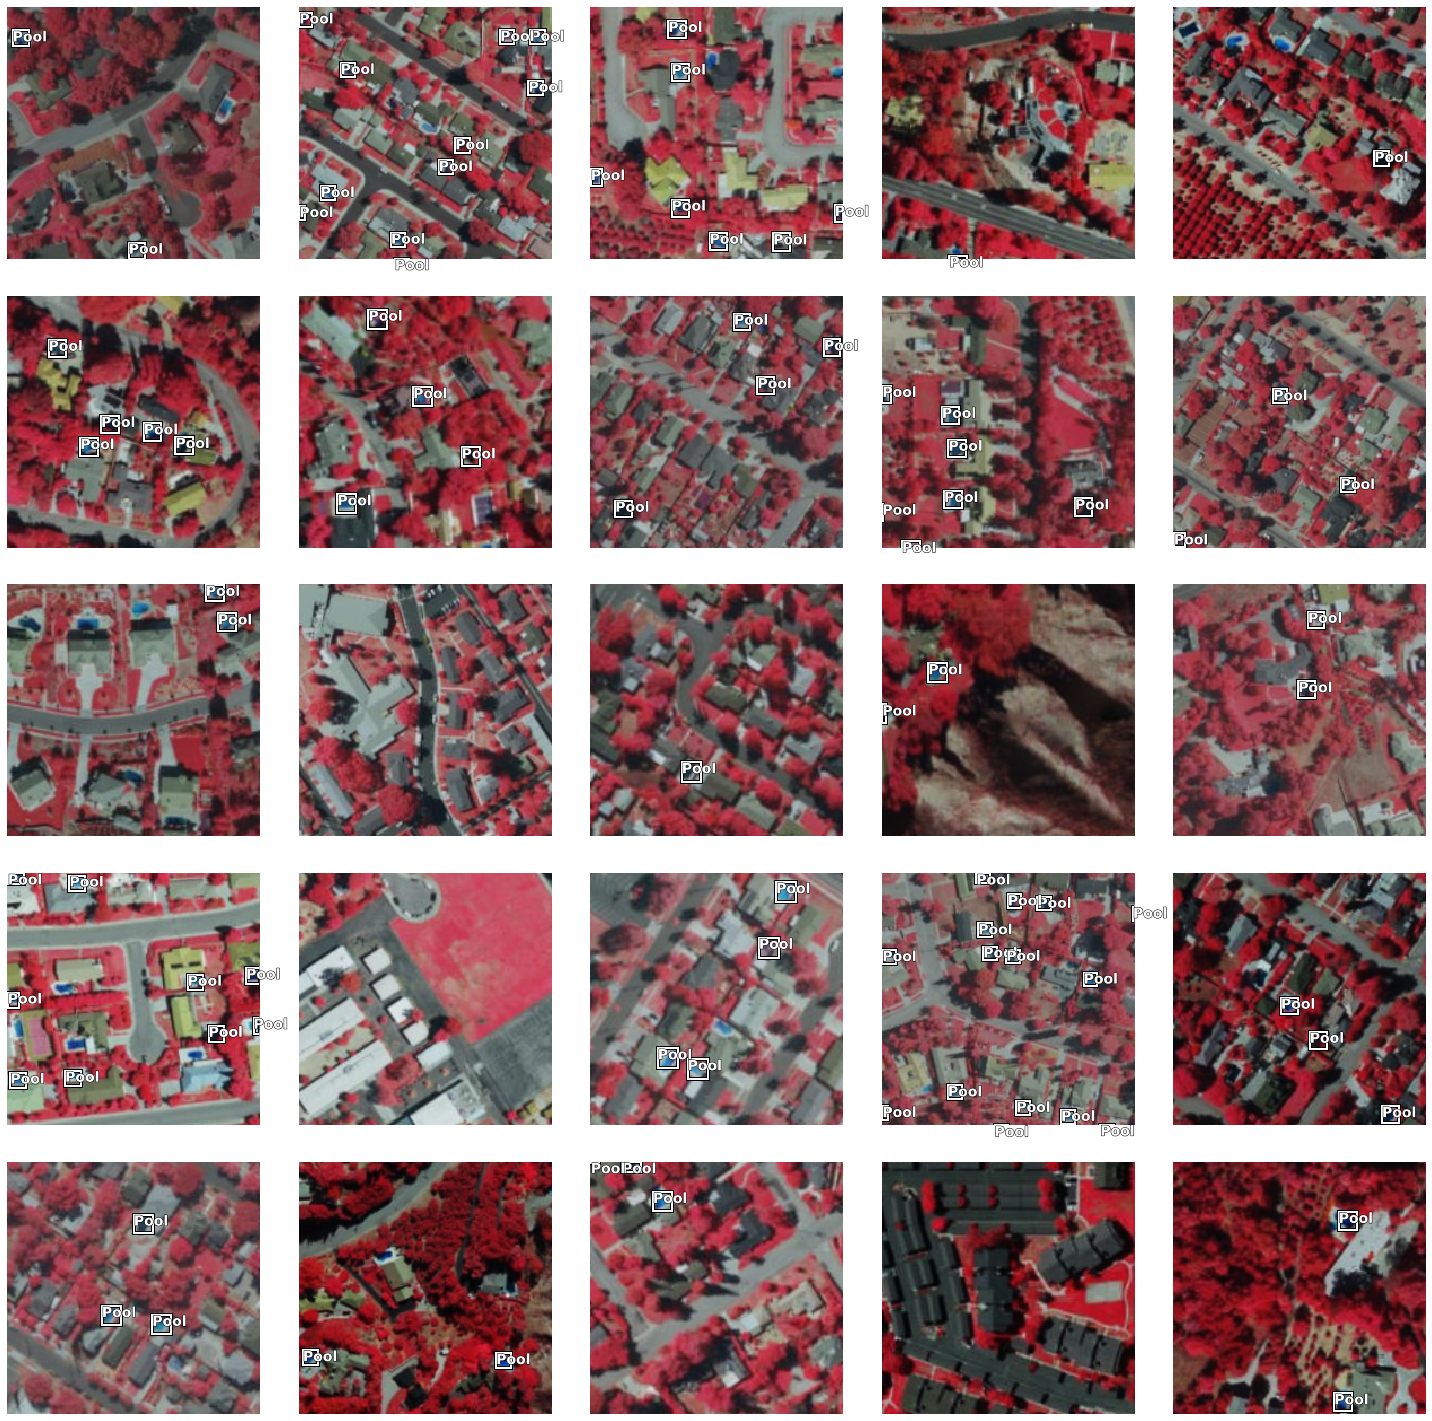

In [3]:
# Show a random sample of image chips.
data.show_batch()

### Define the deep learning model architecture
`arcgis.learn` includes deep learning models that use pretrained Convolutional Neural Networks (CNNs). You will use the Single-Shot Detector (SSD). SSD is one of the most advanced object detection algorithms and is based on a pretrained CNN. A SSD model architecture has been predefined in `arcgis.learn`. For more information about SSD and its integration into `arcigs.learn,` see ArcGIS API for Python Help: [How single-shot detector (SSD) works?](https://developers.arcgis.com/python/guide/how-ssd-works/).

In [4]:
#Train the Single-Shot Detector model
ssd = SingleShotDetector(data)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\HP/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100%|██████████████████████████████████████████████████████████████████| 87306240/87306240 [04:16<00:00, 340246.08it/s]


### Find an optimal learning rate
The learning rate controls the weighting adjustment of the neural network. A low learning rate trains the model slowly, while a high learning rate can jump to conclusions and learn the incorrect information. The ArcGIS Python API provides a learning rate finder that finds a rate which loss, or model error, is lowest before it starts to increase again, indicating that the learning rate is too high and introducing error into the model. 

In [ ]:
ssd.lr_find()

Based on the learning rate plot above, the loss drops dramatically at 1e-2, so you will use this rate for training.

In [ ]:
ssd.fit(25, lr=1e-2)

### Review the model
Comparing the ground truth images with the predicted images will help you determine the accuracy of your model. 

In [ ]:
ssd.show_results()

This model provides a good baseline, predicting most of the pools identified in the ground truth. You could modify the parameters of this tool (number of epochs, grid cell size, and so on) to improve the results of the model. Because these modifications would require more processing time, we will proceed with this model.

In [ ]:
ssd.save('PoolsModel_25_SSD_Script') # save it to your local directory